---
<h1 align='center'> Predicting Zomato Restaurants Ratings</h1>

---

## Deepak Singh

# **1. Import the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

---
# **2. Load the data**

In [3]:
df=pd.read_csv("C:/Users/deepak singh/Desktop/Black Eye/Ineuron/Internship/archive/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


---
# **3. Exploratory Data Analysis (EDA)**

In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
# shape of data
df.shape

(51717, 17)

### dataset have 51717 rows and 17 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Data dictionary

**url** contains the url of the restaurant in the zomato website 

**address** contains the address of the restaurant in Bengaluru

**name** contains the name of the restaurant

**online_order** whether online ordering is available in the restaurant or not

**book_table** table book option available or not

**rate** contains the overall rating of the restaurant out of 5

**votes** contains total number of rating for the restaurant as of the above mentioned date

**phone** contains the phone number of the restaurant

**location** contains the neighborhood in which the restaurant is located

**rest_type** restaurant type

**dish_liked** dishes people liked in the restaurant

**cuisines** food styles, separated by comma

**approx_cost(for two people)** contains the approximate cost of meal for two people

**reviews_list** list of tuples containing reviews for the restaurant, each tuple

**menu_item** contains list of menus available in the restaurant

**listed_in(type)** type of meal

**listed_in(city)** contains the neighborhood in which the restaurant is listed

### There are some null values in dataset. 

### Check how many null value present in each column.

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#columns in datasset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

---
## 3.1 Drop irrelevant and less relevant Columns to make dataset more compact and efficient for more accuracy in predictions.

In [9]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
df.isna().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

---
## 3.2 Remove Duplicates value

In [11]:
df.duplicated().sum()

371

### We have 371 duplicated values so drop it

In [12]:
df.drop_duplicates(inplace=True)

---
## 3.3 Removing Null Values

### check null value percent

In [13]:
(df.isna().sum()/df.shape[0])*100

online_order                    0.000000
book_table                      0.000000
rate                           14.645737
votes                           0.000000
location                        0.037004
rest_type                       0.438204
dish_liked                     54.047053
cuisines                        0.083746
approx_cost(for two people)     0.664122
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

### Dish_liked column has 27751 Null value almost half of total rows

In [14]:
df['dish_liked'].isna().sum()

27751

### Rates column has also 7520 Null values

In [15]:
df['rate'].isna().sum()

7520

### Checking data types of columns or attributes or variables

In [16]:
df.dtypes

online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51346 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51346 non-null  object
 1   book_table                   51346 non-null  object
 2   rate                         43826 non-null  object
 3   votes                        51346 non-null  int64 
 4   location                     51327 non-null  object
 5   rest_type                    51121 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51303 non-null  object
 8   approx_cost(for two people)  51005 non-null  object
 9   listed_in(type)              51346 non-null  object
 10  listed_in(city)              51346 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


### Reading uninque values from the Rate column

In [18]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

###  Removing '-' and " " from rate column and dealing with unwanted values.

In [19]:
#df.rates.str.replace('-',np.NaN)
df['rate'] = df['rate'].astype(str)
df['rate']=df['rate'].str.replace(" ","")
df['rate']=df['rate'].str.replace('-','NaN')
df['rate']=df['rate'].fillna('NaN')
df = df.loc[df.rate !='NEW'] #getting rid of "NEW"

df = df.loc[df.rate !='nan']

#Remove all '/5' and replace with ''
df['rate'] = df['rate'].str.replace('/5','')

# convert rate to float
df['rate'] = df['rate'].astype(float)

In [20]:
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       nan, 4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
df.shape

(41654, 11)

## Remove the NaN values from the dataset

In [22]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### Remove ',' from "approx_cost(for two people)" columns

In [23]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(",","")
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1350',
       '2200', '1400', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [24]:
df.isna().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### Rename the columns

In [25]:
df=df.rename(columns={"approx_cost(for two people)" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [26]:
df['avg_cost']=df['avg_cost'].astype(int)

In [27]:
df.shape

(23218, 11)

### Check null values in columns

In [28]:
df.isna().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
avg_cost        0
meal_type       0
city            0
dtype: int64

### See we have no null values in 'rates' and 'avg_cost' now
### Only 'cuisines' and 'dish_liked' columns have a null values

### Remove 'cuisine' null values

In [29]:
df.dropna(subset=['cuisines'], inplace= True)

In [30]:
df.isna().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
avg_cost        0
meal_type       0
city            0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 51715
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  23218 non-null  object 
 1   book_table    23218 non-null  object 
 2   rate          23218 non-null  float64
 3   votes         23218 non-null  int64  
 4   location      23218 non-null  object 
 5   rest_type     23218 non-null  object 
 6   dish_liked    23218 non-null  object 
 7   cuisines      23218 non-null  object 
 8   avg_cost      23218 non-null  int32  
 9   meal_type     23218 non-null  object 
 10  city          23218 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 2.0+ MB


In [32]:
df=df[df.cuisines.isna()==False]
df=df[df.rest_type.isna()==False]
df.isna().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
avg_cost        0
meal_type       0
city            0
dtype: int64

### See no Null value in 'cuisines'column now

In [33]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [34]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

### As you see 'Location' columns has more sublocations
### and 'city' columns have a better Locations so we drop 'Location' column

In [35]:
del df['location']
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


---
# **4. Data Visualization**

## 4.1 Number of restaurtants that take online order

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


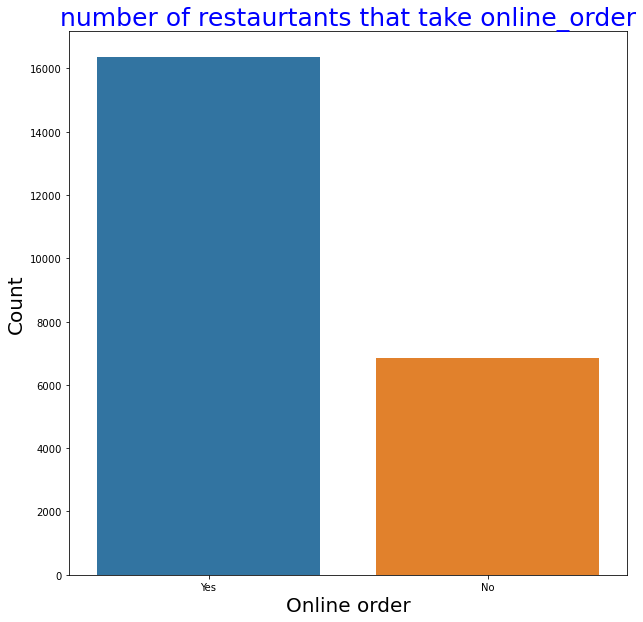

In [36]:
plt.figure(figsize=(10,10))

sns.countplot(df['online_order'])
plt.title("number of restaurtants that take online_order",fontsize=25,color='blue')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Online order",fontsize=20)
plt.show()

---
## 4.2 number of restaurants that have the option to book table

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


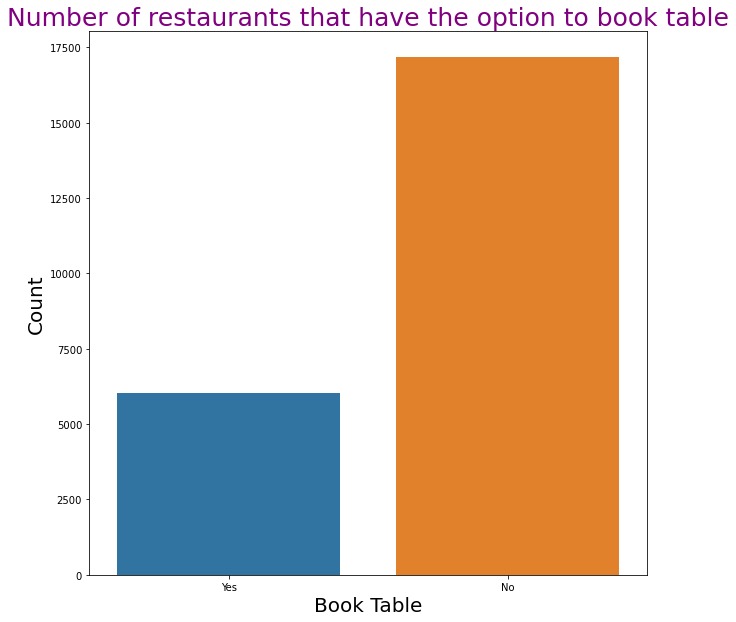

In [37]:
plt.figure(figsize=(10,10))

sns.countplot(df['book_table'])
plt.title("Number of restaurants that have the option to book table",fontsize=25,color='purple')
plt.ylabel("Count",fontsize=20)
plt.xlabel("Book Table",fontsize=20)
plt.show()

---
## 4.3 Number of restaurants with meal type

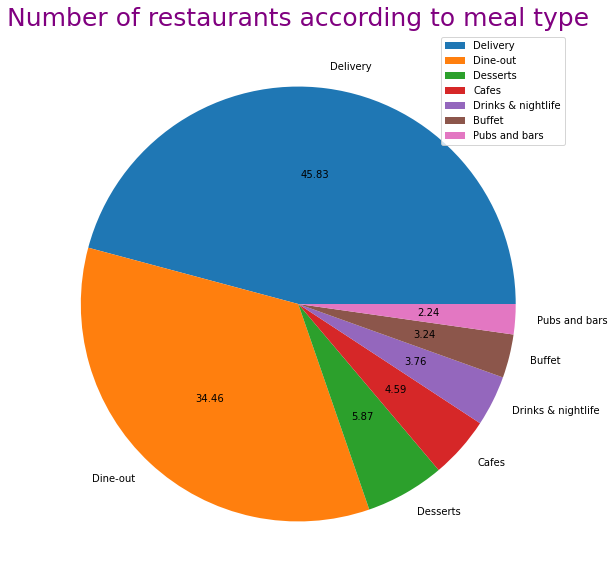

In [38]:
plt.figure(figsize=(10,10))
ax =df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of restaurants according to meal type",fontsize=25,color='purple')
plt.legend()
plt.show()

---
## 4.4 number of restaurants in each area of banglore

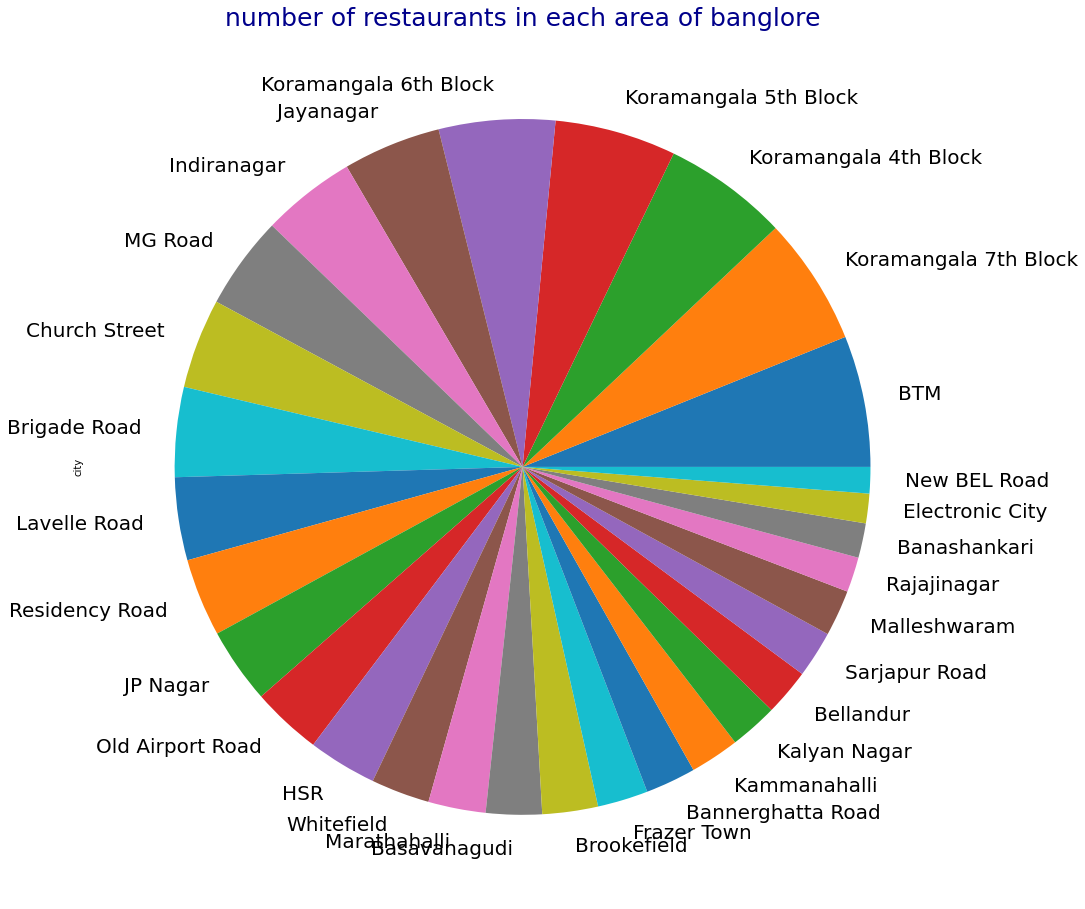

In [39]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=25,color='darkblue')
plt.show()

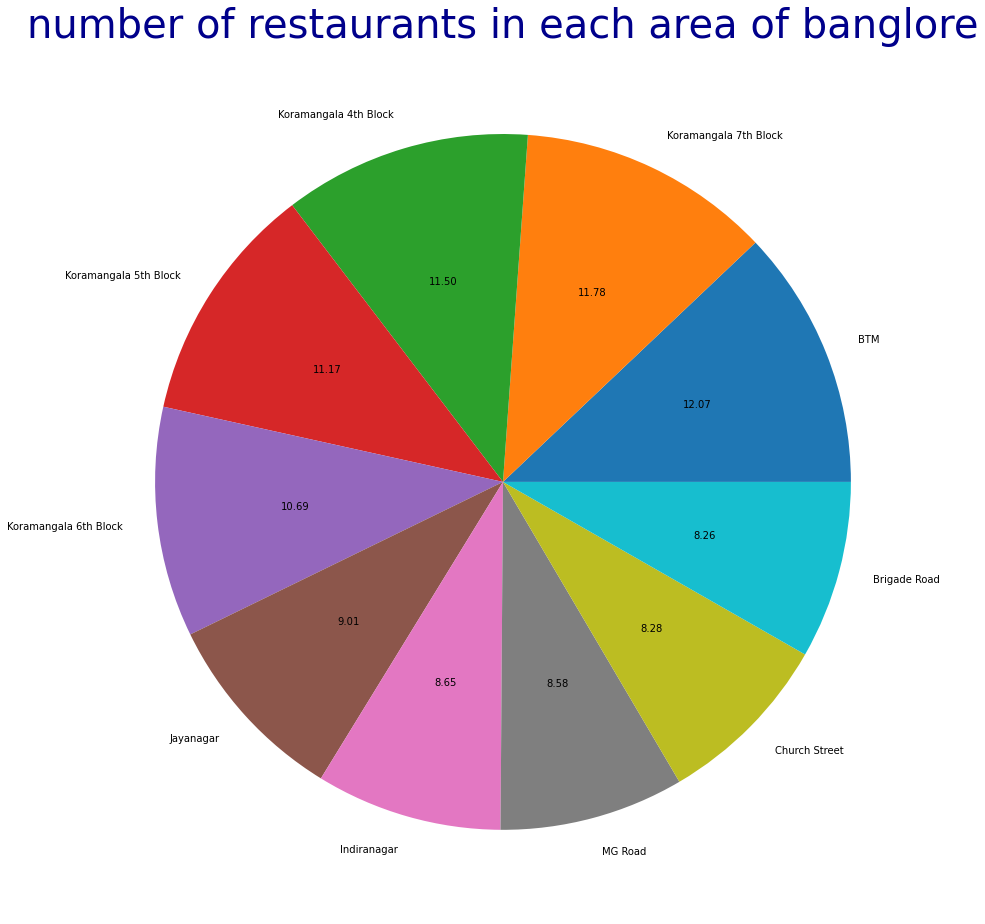

In [40]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()[:10]
labels=df['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

### BTM location have most of restaurants
### TOP 10 location restaurants

<AxesSubplot:>

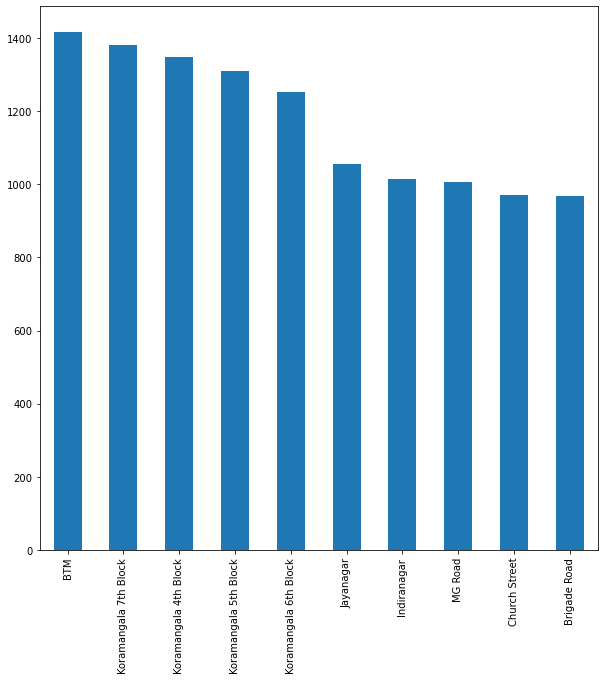

In [41]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

---
## 4.5 Type of Restaurant in City

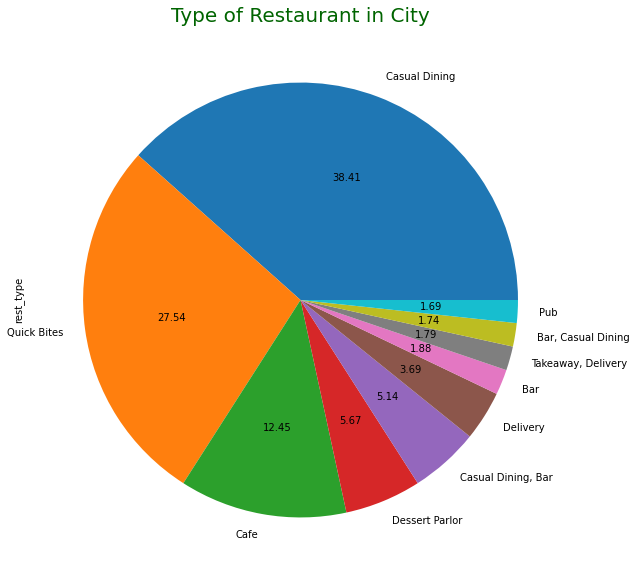

In [42]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
label=df['rest_type'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

---
## 4.6 Number of Type of Restaurant in City

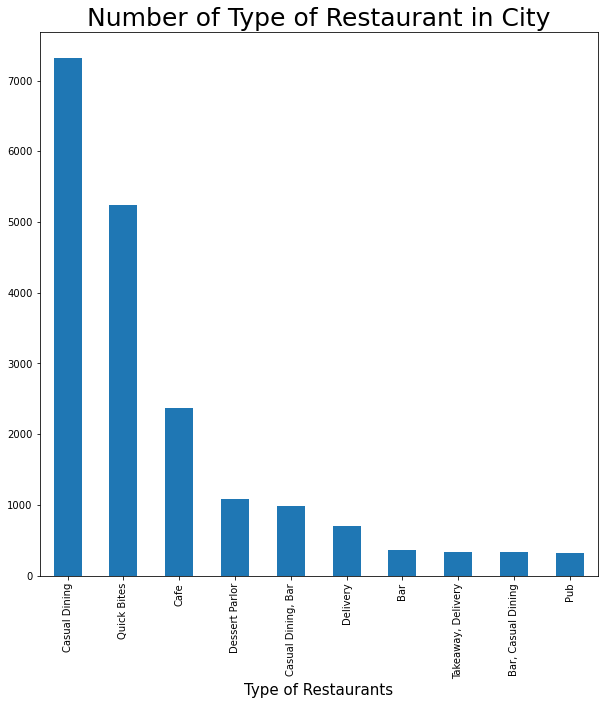

In [43]:
plt.figure(figsize=(10,10))

ax=df.rest_type.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Number of Type of Restaurant in City",fontsize=25)
plt.xlabel("Type of Restaurants",fontsize=15)
plt.show()

---
## 4.7 Average cost for two person

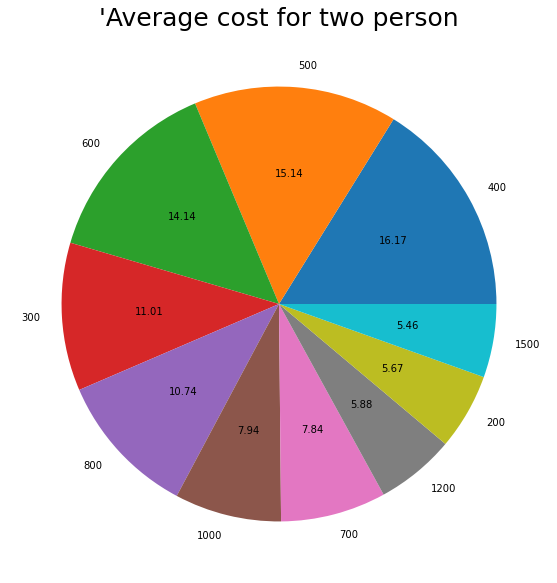

In [44]:
plt.figure(figsize=(10,10))

ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

---
## 4.8 Top 10 dished_liked in Bangalore

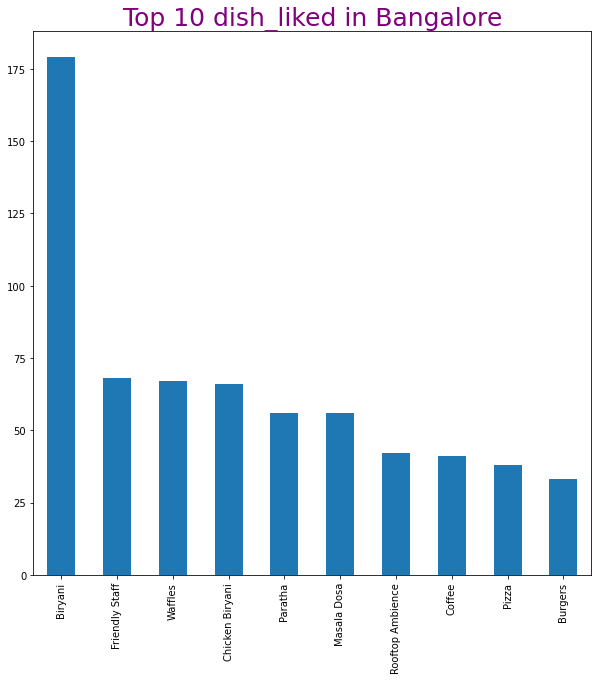

In [45]:
plt.figure(figsize=(10,10))
ax=df['dish_liked'].value_counts()[:10]
ax.plot(kind='bar')
plt.title("Top 10 dish_liked in Bangalore",fontsize=25,color='purple')
plt.show()

In [46]:
df['rate']=df['rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 51715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  23218 non-null  object 
 1   book_table    23218 non-null  object 
 2   rate          23218 non-null  float64
 3   votes         23218 non-null  int64  
 4   rest_type     23218 non-null  object 
 5   dish_liked    23218 non-null  object 
 6   cuisines      23218 non-null  object 
 7   avg_cost      23218 non-null  int32  
 8   meal_type     23218 non-null  object 
 9   city          23218 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 2.4+ MB


In [47]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

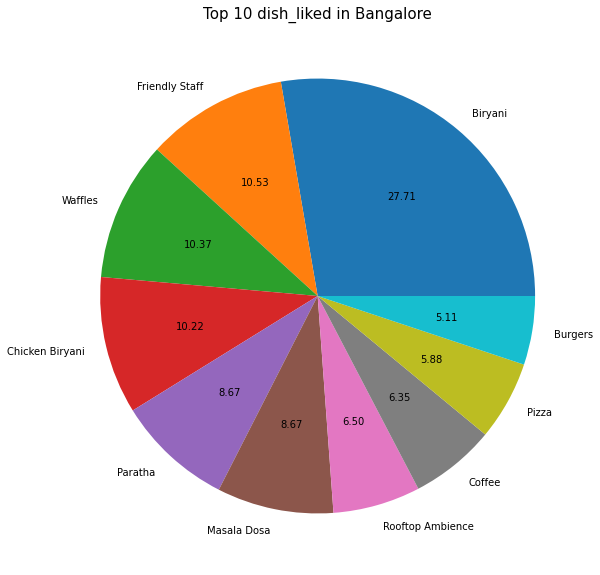

In [48]:
plt.figure(figsize=(10,10))
ax=df.dish_liked.value_counts()[:10]
label=df['dish_liked'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("Top 10 dish_liked in Bangalore",fontsize=15)
plt.show()

### We can see that Biryani is most favorite in bangalore

---
## 4.9 Top 10 Cuisine

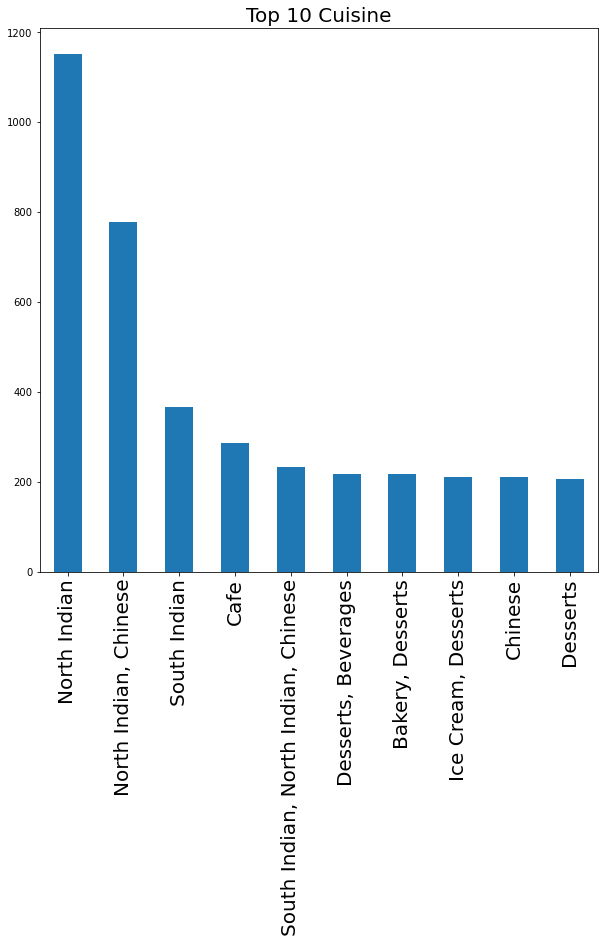

In [49]:
plt.figure(figsize=(10,10))

ax=df.cuisines.value_counts()[:10]
ax.plot(kind='bar')

plt.title("Top 10 Cuisine",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

---
## Rate VS Online Order

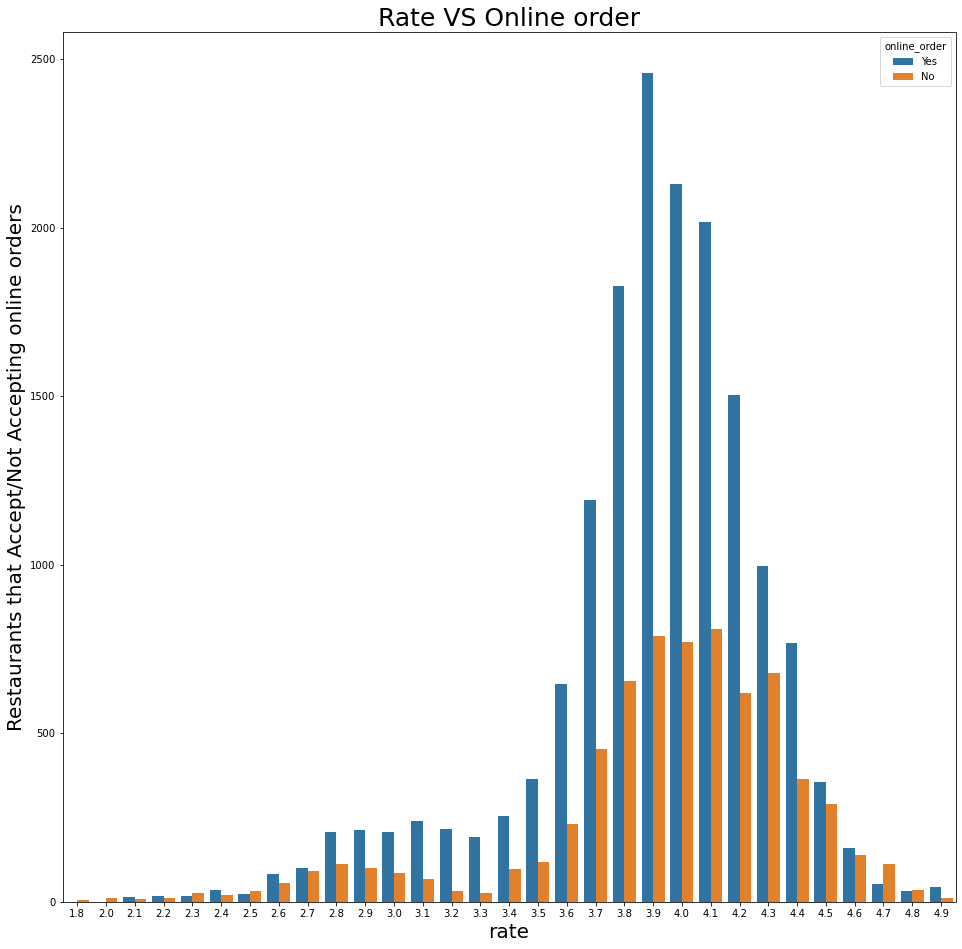

In [50]:
plt.figure(figsize=(16,16))

sns.countplot(x=df['rate'],hue=df['online_order'])
plt.title("Rate VS Online order",fontsize=25)
plt.ylabel("Restaurants that Accept/Not Accepting online orders",fontsize=20)
plt.xlabel("rate",fontsize=20)
plt.show()

---
# 5. Data Preprocessing

## 5.1 Data transformation
### lets Convert categorical data into numerical data using LabelEncoding

### Now we drop unwanted Columns

In [51]:
df=df.drop(['dish_liked','meal_type'],axis=1)

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,city
0,1,1,4.1,775,20,1386,800,1
1,1,0,4.1,787,20,594,800,1
2,1,0,3.8,918,16,484,800,1
3,0,0,3.7,88,62,1587,300,1
4,0,0,3.8,166,20,1406,600,1


### As you can see out data is Label Encoded

---
# 6. Data Transformation

## 6.1 Feature Selection and Feature Scaling

### Select the feature and Label(target) from the data

In [54]:
df.shape

(23218, 8)

In [55]:
#Drop null values
df.dropna(how='any',inplace=True)
df.shape

(23218, 8)

In [56]:
# selecing features
features=df.drop(['rate'],axis=1)
features.shape

(23218, 7)

In [57]:
features.dtypes

online_order    int32
book_table      int32
votes           int64
rest_type       int32
cuisines        int32
avg_cost        int32
city            int32
dtype: object

In [58]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [59]:
# selecting Class/ Label
label=df['rate'].values
label

array([4.1, 4.1, 3.8, ..., 2.8, 2.5, 4.3])

## 6.1 Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [61]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 0.64765226,  1.68699436,  0.15341614, ...,  1.10625334,
         0.09049271, -1.63320021],
       [ 0.64765226, -0.59277021,  0.16420077, ..., -0.56601114,
         0.09049271, -1.63320021],
       [ 0.64765226, -0.59277021,  0.28193301, ..., -0.7982701 ,
         0.09049271, -1.63320021],
       ...,
       [-1.54403847, -0.59277021, -0.39839757, ..., -0.68214062,
         0.85950607,  1.79700039],
       [-1.54403847, -0.59277021, -0.47029512, ..., -1.6512939 ,
         0.09049271,  1.79700039],
       [-1.54403847,  1.68699436, -0.33099361, ...,  0.03363925,
         3.35879947,  1.79700039]])

---
## 6.2 Split the data

### We splited out train and test set into 90% and 10% respectively

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [63]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20896, 7), (2322, 7), (20896,), (2322,))

---
## 6.3 Apply Regressions Models

---
## 1. Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

### Train the model on train set

In [65]:
lin_reg.fit(X_train,y_train)

LinearRegression()

### Check the model socre on train and test set

In [66]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.22206148896370193
0.22031335479322178


### New Predict

In [67]:
lin_reg_pred=lin_reg.predict(X_test)

In [68]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 22.031335479322177


---
## 2. Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

In [70]:
rr=Ridge()
rr

Ridge()

In [71]:
rr.fit(X_train,y_train)

Ridge()

In [72]:
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))

0.2220614887268566
0.22031356817246162


In [73]:
rr_pred=rr.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

Accuracy score for RidgeR : 22.031356817246163


---
## 3 Lasso

In [75]:
from sklearn.linear_model import Lasso

In [76]:
lr=Lasso()
lr

Lasso()

In [77]:
lr.fit(X_train,y_train)

Lasso()

In [78]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.0
-0.0004514398276911358


In [79]:
lr_pred=lr.predict(X_test)

In [80]:
from sklearn.metrics import r2_score

lr_score=r2_score(y_test,lr_pred)*100
print("Accuracy score for LR :",lr_score)

Accuracy score for LR : -0.04514398276911358


---
## 4. Random Forest Regressor

In [81]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [82]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9876628049045351
0.9015685850578896


In [84]:
rfr_pred=rfr.predict(X_test)

In [85]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 90.15685850578896


---
## 5. Support Vector Regression

In [86]:
from sklearn.svm import SVR

In [87]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [88]:
print(svr.score(X_train,y_train))
print(svr.score(X_test,y_test))

0.344902400253315
0.318126172419928


In [89]:
svr_pred=svr.predict(X_test)

In [90]:
from sklearn.metrics import r2_score

svr_score=r2_score(y_test,svr_pred)*100
print("Accuracy score for LR :",svr_score)

Accuracy score for LR : 31.812617241992804


In [91]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','RandomForest Reg','Support Vector Reg'],
            "Accuracy socre":[lin_reg_score,rr_score,lr_score,rfr_score,svr_score]})

,Model Names,Accuracy socre
0,Linear Reg,22.031335
1,Ridge Reg,22.031357
2,Lasso Reg,-0.045144
3,RandomForest Reg,90.156859
4,Support Vector Reg,31.812617


## As you can see from above data "Random Forest Regressor" Given the **highest Accuacry** score

---
# PREDICT THE RATING with Random Forest Regressor Model

In [92]:
rfr.predict([[1,0,13,73,1900,350,27]])

array([4.393])

## We got 4.4 Rating for out first predict over model

## Compare Actual rating with Random Forest Regressor new Predicted Rating

In [93]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.8,3.90
1,4.1,4.10
2,3.7,3.71
3,2.9,2.91
4,4.1,4.02
...,...,...
2317,3.6,3.59
2318,3.9,3.73
2319,3.9,3.92
2320,3.0,3.01


## AS you can see Our model is working good its predicted Ratings is Nearly to the Actual Ratings

---
## Save Ratings Sample as a CSV file

In [94]:
sample.to_csv("Model Prediction Sample.csv",index=False)